In [14]:
import os
import cv2
import tensorflow as tf
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
# from keras.models import load_model
from config import imshape, model_name, n_classes
from models import preprocess_input, dice
from tensorflow.keras.utils import to_categorical
# from keras.utils import to_categorical
from utils import add_masks
import matplotlib.pyplot as plt

In [15]:
model = load_model(os.path.join('saved-model', 'unet_multi.model'),
                   custom_objects={'dice': dice})

W0105 22:59:49.744556 11468 deprecation.py:506] From d:\code-setup\miniconda3\envs\obj\lib\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 22:59:49.745555 11468 deprecation.py:506] From d:\code-setup\miniconda3\envs\obj\lib\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 22:59:49.752556 11468 deprecation.py:506] From d:\code-setup\miniconda3\envs\obj\lib\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.o

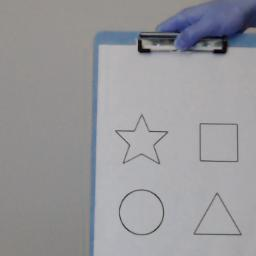

In [21]:
img_bgr = cv2.imread('dataset/shapes/validation/images/26.jpg')
Image.fromarray(img_bgr)

In [23]:
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img.shape)

(256, 256, 3)


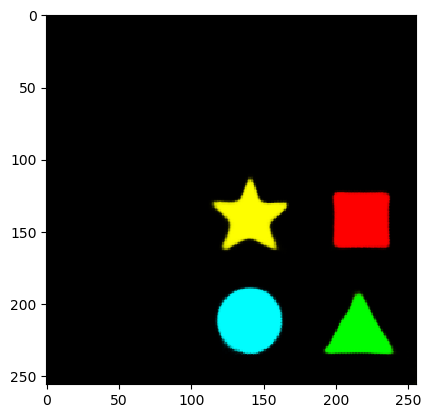

In [24]:
# only predictions on black background
tmp = np.expand_dims(img, axis=0)
roi_pred = model.predict(tmp)
roi_mask = roi_pred.squeeze() * 255.0
roi_mask = add_masks(roi_mask)
plt.imshow(roi_mask)
plt.show()

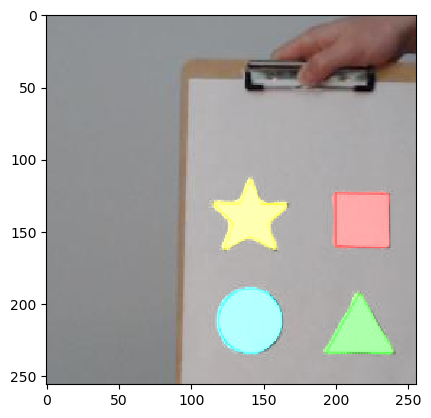

In [25]:
# remove background
roi_mask = np.array(roi_mask, dtype=np.uint8)
roi_mask = cv2.addWeighted(img, 1.0, roi_mask, 1.0, 0)
plt.imshow(roi_mask)
plt.show()

In [ ]:
#im = Image.fromarray(roi_mask)
#im.save("your_file.jpeg")